In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [2]:
# define the vectorized functions for defining the ode
#x = np.array([1, 2, 3, 4, 5])
sinh = lambda t: math.sinh(t)
vsinh = np.vectorize(sinh)
#vfunc(x)
cosh = lambda t: math.cosh(t)
vcosh = np.vectorize(cosh) 

# define the ode dynamics
def model(m,t,x,b1,b2):
    dmdt = 2*vsinh(b1*x + b1*m + b2*np.mean(m)) - 2*m*vcosh(b1*x + b1*m + b2*np.mean(m))
    return dmdt


In [3]:
b1 = 0.1;
b2 = 2.5;
Nspin = 1000;   # numero degli x_i con cui approssimare l'asse reale
Ntime = 300;   # asse temporale della ode
    
x = np.random.normal(0,1,Nspin) 
M = np.zeros(Ntime) 

    

In [4]:

# initial condition

eps = 0 #if you want to put a bias in the initial distribution 


m0 = -1+eps + (2-eps)*np.random.random_sample(Nspin) #initialize the magnetizations vector, with eps/2 bias
#m0 = np.repeat(1,Nspin)


# time points
t = np.linspace(0,Ntime)


# solve ODE
m = odeint(model,m0,t,args=(x,b1,b2))

M = np.mean(m,axis=1)   # takes the mean of every row, thus stores the evolution in time of M   

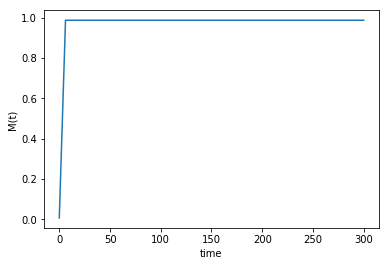

In [5]:
plt.plot(t,M)
plt.xlabel('time')
plt.ylabel('M(t)')
plt.show()